preparing phase


100%|█████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 25081.05it/s]


preparing matrix


100%|█████████████████████████████████████████████████████████████████████████████| 5000/5000 [00:29<00:00, 169.46it/s]


approximate diagonalization


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:12<00:00,  8.13it/s]


Check error


100%|██████████████████████████████████████████████████████████████████████████████| 5000/5000 [01:40<00:00, 49.93it/s]


average error 0.018097332310963506
0
Best eigenvector [-0.00663808+0.01248743j -0.01278106+0.00605348j  0.00856967+0.01124993j
 ... -0.00834582+0.01141697j  0.00838409-0.0113889j
 -0.01164389+0.0080262j ]
Best eigenvalue 20.403459074316434
abs sum/N 0.01806465293944743


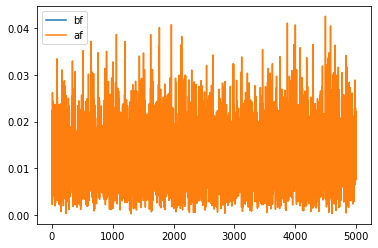

Check orthogonality


100%|██████████████████████████████████████████████████████████████████████████████| 5000/5000 [05:25<00:00, 15.36it/s]

average orthogonality 5.096678508414617e-06
Wall time: 7min 48s


In [54]:
%%time
%matplotlib inline
import matplotlib.pyplot as plt
import math
import numpy as np
import random
import tqdm


def const(N):
    return 1/math.sqrt(N)

def is_symmetric(a):
    return np.array_equal(a, a.T)

def uniform_rand(W):
    return W*(np.random.rand()-0.5)

def nrm(vec):
    nr=np.linalg.norm(vec)

    return nr
    
N=5000

H=np.empty((N,N),dtype=complex)
TvecNP=np.full_like(N,const(N),dtype=complex)
Phi=np.empty((N,N),dtype=complex)
TvecP=np.empty(N,dtype=complex)
Phase=np.empty(0,dtype=complex)
crossmin=0.6
maxidx=N
#maxidx=10

TestMode=False
EigenVectors=False
div=50
PS=int(N/div)

print('preparing phase')
for n in tqdm.tqdm(range(PS)):
    np.pi*np.pi
    r=np.random.rand()
    ph=np.exp(2j*math.pi*r)
    Phase=np.append(Phase,ph)

W=1
    
print("preparing matrix")
for n in tqdm.tqdm(range(N)):
    np.pi*np.pi
    for m in range(N):
        if m>=n:
            H[m][n]=uniform_rand(W)
        else:
            H[m][n]=H[n][m]

nrmin=[W*N**2]*N
idx=0

print("approximate diagonalization")
for phsmp in tqdm.tqdm(range(PS)):
    np.pi*np.pi
    ph=random.choices(Phase,k=N)
    TvecP=TvecNP*ph
    PhiVec=H@TvecP
    PhiVec=PhiVec/nrm(PhiVec)
    maxcross=0
    if idx< maxidx:
        for l in range(maxidx):
            maxcross=max(maxcross,abs(TvecP.conj()@Phi[l]))
        if crossmin>maxcross:
            Phi[idx]=TvecP
            nrmin[idx]=sum(abs(PhiVec-TvecP))/N
            idx+=1
    else:
        for l in range(maxidx):
            if (TvecP.conj()@Phi[l])>0.8 and nrmin[l]>sum(abs(PhiVec-TvecP))/N:
                Phi[l]=TvecP
                nrmin[l]=sum(abs(PhiVec-TvecP))/N
                break                           

print("Check error")                
average=0
summin=W*N**2
best=1
nbest=0
count0=0
for n in tqdm.tqdm(range(maxidx)):
    np.pi*np.pi
    CPhi=H@Phi[n]
    lam=nrm(CPhi)
    if EigenVectors:
        print(n)
        print(Phi[n])
        print(CPhi/lam)
    if lam>10**-16:
        b=sum(abs(CPhi/lam-Phi[n]))
        average+=b/maxidx
        if b<best:
            best=b
            nbest=n
    else:
        count0+=1    
    if TestMode:
        print('abs sum/N',sum(abs(CPhi/lam-Phi[n]))/N)
        plt.plot(abs(Phi[n]),label='bf')
        plt.plot(abs(CPhi/lam),label='af')
        plt.legend()
        plt.show()
print('average error',average/(N-count0))

print(nbest)
print('Best eigenvector',Phi[nbest])
CPhi=H@Phi[nbest]
lam=nrm(CPhi)
print('Best eigenvalue',lam)
print('abs sum/N',sum(abs(CPhi/lam-Phi[nbest]))/N)
plt.plot(abs(Phi[nbest]),label='bf')
plt.plot(abs(CPhi/lam),label='af')
plt.legend()
plt.show()
        
print("Check orthogonality")
cross=0
for n in tqdm.tqdm(range(maxidx)):
    np.pi*np.pi
    for m in range(maxidx):
        if n <m:
#            print('dot product',n,m,abs(Phi[n].conj()@Phi[m]))
            cross+=abs(Phi[n].conj()@Phi[m])/(N*(N-1))               

print("average orthogonality",2*cross)